In [9]:
import json
import os
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
def returnfig(x,y, title):
    fig = plt.figure()
    plt.title(title)
    a = plt.plot(x,y)
    return fig

# json_files = [item for item in os.listdir('.') if item.endswith('.json')]
# for json_file in json_files:
#     with open(json_file, "r") as tmp:
#         data = json.load(tmp)
#         old_keys = data.copy().keys()
#         for key in old_keys:
#             new_key = key.replace("\n", "")
#             data[new_key] = data.pop(key)
#     os.remove(json_file)
#     with open(json_file, "w") as tmp:
#         json.dump(data, tmp)

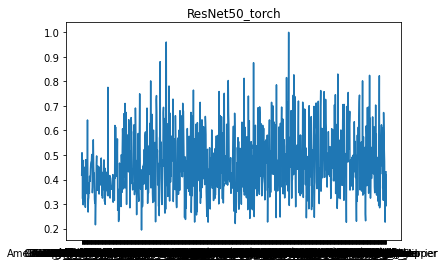

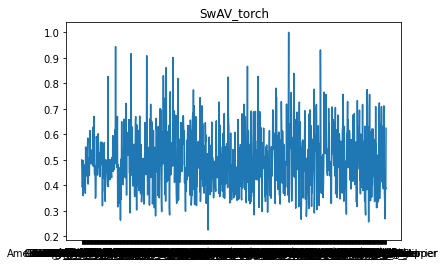

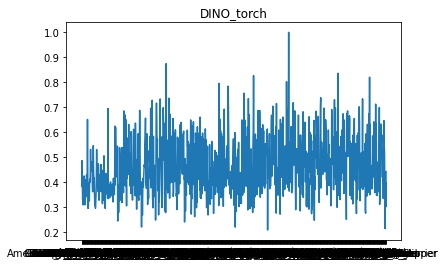

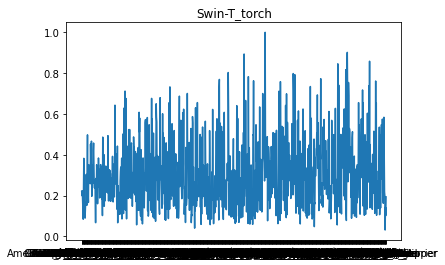

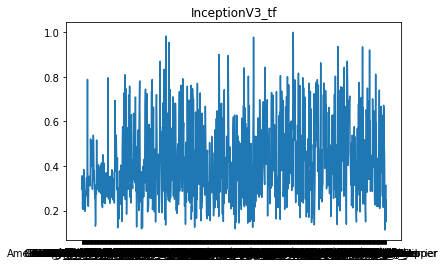

In [10]:
json_files = [item for item in os.listdir('.') if item.endswith('.json')]
pdfsave = PdfPages('visualize.pdf')
for json_file in json_files:
    with open(json_file, "r") as tmp:
        data = json.load(tmp)
        maximum = max(data.values())
        for key, value in data.items():
            data[key] = value / maximum
        myList = sorted(data.items())
        x,y = zip(*myList)
        fig = returnfig(x,y, json_file[17:-5])
        pdfsave.savefig(fig)
pdfsave.close()
    


In [5]:
import os
import numpy as np
import json
json_files = [item for item in os.listdir('.') if item.endswith('.json')]
for json_file in json_files:
    with open(json_file, "r") as tmp:
        data = json.load(tmp)
        maximum = max(data.values())
        minimum = min(data.values())
        for key, value in data.items():
            data[key] = value / maximum
        mean = np.mean(list(data.values()))
        std = np.std(list(data.values()))
        for key, value in data.items():
            data[key] = value / maximum
        print(f"{json_file} {maximum}, {minimum}, {mean}, {std}")
    


intra_class_fids_InceptionV3_tf.json 231.7135714196371, 26.205540344001243, 96.50363115656079, 41.05793782041555
intra_class_fids_ResNet50_torch.json 378.7012770884595, 73.65606312288216, 176.62012430463918, 48.60628722030611
intra_class_fids_SwAV_torch.json 34.008827167959446, 7.635097123900458, 17.087918557342, 3.96608311047008
intra_class_fids_DINO_torch.json 16067.524502645985, 3338.5090639003683, 7449.93158874193, 1850.754147721715
intra_class_fids_Swin-T_torch.json 409.6194729176518, 12.769162212119971, 123.97283787784704, 68.23266321221463


In [4]:
data.values()

dict_values([49.24944467635932, 85.8660644954357, 51.57593800296303, 46.34235882320408, 65.75087093670952, 96.0378867895068, 90.29596873861641, 74.20913305769947, 71.12365643093071, 49.491054540895874, 52.089909961416005, 36.00606340126954, 48.36031038984984, 33.507533687142654, 44.58237231303165, 38.79265675412398, 47.42523829215503, 43.24814900417168, 55.76689880196571, 31.444811480756314, 50.997115560088645, 75.64878308468444, 42.723136628628076, 66.47713505129673, 40.99635913633722, 30.25403382907139, 65.99298066598291, 60.712794433335404, 51.12081475273615, 75.48359441231572, 59.76373309457669, 53.27412781908045, 88.45739794550605, 93.49583814563223, 123.50858493767035, 72.1056706991954, 82.06405952951275, 44.98368163314418, 68.56776421086093, 58.336370037973055, 45.75062066342488, 51.38323918818756, 56.75608428214112, 86.32384267925076, 84.13816992516473, 85.07848370578353, 57.94138067871181, 82.57457190834593, 49.52949814865006, 80.95572234569275, 77.28291950118731, 100.80909980

In [17]:
k = 10
print(f"Top {k} highest & Lowest FID classes")
print("================HIGHEST====================")
for json_file in json_files:
    with open(json_file, "r") as tmp:
        data = json.load(tmp)
        print(f"backbone: {json_file[17:-5].ljust(15)} {sorted(data, key=data.get, reverse=True)[:k]}")
print("================LOWEST====================")
for json_file in json_files:
    with open(json_file, "r") as tmp:
        data = json.load(tmp)
        print(f"backbone: {json_file[17:-5].ljust(15)} {sorted(data, key=data.get, reverse=False)[:k]}")


Top 10 highest & Lowest FID classes
================HIGHEST====================
backbone: ResNet50_torch  ['pickelhaube', 'chime', 'carton', 'loupe', 'spotlight', 'plate_rack', 'velvet', 'whistle', 'pedestal', 'ladle']
backbone: SwAV_torch      ['pickelhaube', 'abacus', 'screw', 'barrel', 'bottlecap', 'coil', 'lens_cap', 'chime', 'plate_rack', 'chain']
backbone: DINO_torch      ['pickelhaube', 'chime', 'spotlight', 'loupe', 'velvet', 'pedestal', 'hair_slide', 'hook', 'ladle', 'screwdriver']
backbone: Swin-T_torch    ['miniskirt', 'sunglasses', 'ladle', 'velvet', 'spotlight', 'suit', 'sunglass', 'hook', 'plastic_bag', 'plunger']
backbone: InceptionV3_tf  ['plastic_bag', 'chime', 'loupe', 'cleaver', 'spotlight', 'tray', 'velvet', 'hair_slide', 'hook', 'sunglasses']
================LOWEST====================
backbone: ResNet50_torch  ['black_and_gold_garden_spider', 'European_fire_salamander', 'jacamar', 'sulphur_butterfly', 'geyser', "yellow_lady's_slipper", 'echidna', 'monarch', 'cabbag